In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Binarized data

In [2]:
column_names = [
            'age',
            'sex',
            'cp',
            'trestbps',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'target'
]
df = pd.read_csv('../data_sets/heart.csv', names=column_names)
df['target'] = [x == '1' for x in df['target']]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,False
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,True
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,True
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,True
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,True


In [3]:
X = pd.get_dummies(df[column_names[:-1]], prefix=column_names[:-1]).astype(bool)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
import classifier
bin_cls = classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard-support")

In [5]:
bin_cls.predict(X_test.values)

In [6]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions))

0.7934782608695652
0.8224299065420562


# Pattern structures

In [7]:
column_names = [
            'age',
            'sex',
            'cp',
            'trestbps',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'target'
]
df = pd.read_csv('../data_sets/heart.csv', names = column_names)
df['target'] = [x == '1' for x in df['target']]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,False
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,True
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,True
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,True
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,True


In [8]:
X = df[column_names[:-1]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
import classifier
pat_cls = classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), 
                                             categorical=np.arange(X_train.shape[1]))

In [10]:
pat_cls.predict(X_test.values)

In [11]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, pat_cls.predictions))
print(f1_score(y_test, pat_cls.predictions))

0.7934782608695652
0.8256880733944953


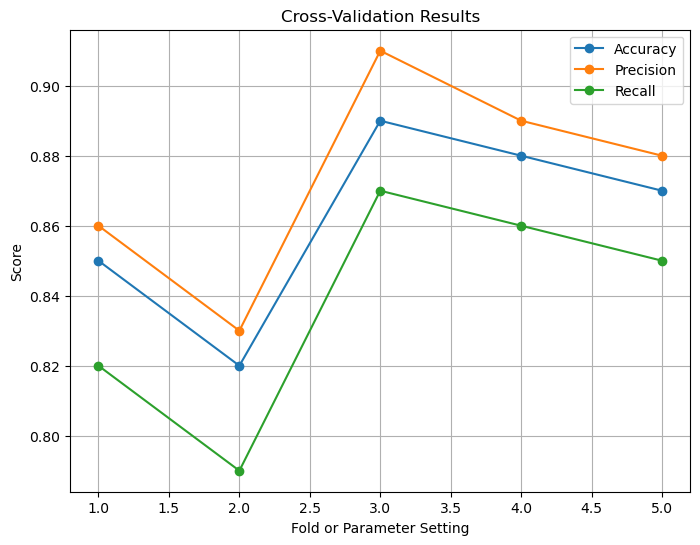

In [16]:
import matplotlib.pyplot as plt

# Assuming cv_results is a dictionary containing cross-validation scores
# For example:
cv_results = {
    'accuracy': [0.85, 0.82, 0.89, 0.88, 0.87],  # Mean accuracy scores for each fold or parameter setting
    'precision': [0.86, 0.83, 0.91, 0.89, 0.88],  # Mean precision scores
    'recall': [0.82, 0.79, 0.87, 0.86, 0.85]  # Mean recall scores
}

# Plotting the cross-validation results
plt.figure(figsize=(8, 6))

# Plotting mean accuracy
plt.plot(range(1, len(cv_results['accuracy']) + 1), cv_results['accuracy'], marker='o', label='Accuracy')
# Plotting mean precision
plt.plot(range(1, len(cv_results['precision']) + 1), cv_results['precision'], marker='o', label='Precision')
# Plotting mean recall
plt.plot(range(1, len(cv_results['recall']) + 1), cv_results['recall'], marker='o', label='Recall')

plt.xlabel('Fold or Parameter Setting')
plt.ylabel('Score')
plt.title('Cross-Validation Results')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df = pd.read_csv('../data_sets/cost_of_living.csv', names=["Countries","Cost of living, 2017","Global rank","Available data"])
# print(df.columns)
df['Cost of living, 2017'] = [float(x) >= 100.0 for x in df['Cost of living, 2017']]
df.sample(10)

,Countries,"Cost of living, 2017",Global rank,Available data
89,Colombia,False,89.0,2017 - 2017
97,Bosnia & Herz.,False,97.0,2017 - 2017
75,Namibia,False,75.0,2017 - 2017
69,Bahrain,False,69.0,2017 - 2017
130,Bolivia,False,130.0,2017 - 2017
114,Chad,False,114.0,2017 - 2017
110,Togo,False,110.0,2017 - 2017
45,Estonia,False,45.0,2017 - 2017
115,Cameroon,False,115.0,2017 - 2017
56,Kuwait,False,56.0,2017 - 2017


In [26]:
X = df.iloc[:,:-1]
y = df['Cost of living, 2017']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: 'Cost of living, 2017'

In [ ]:
pat_cls = classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy())

In [ ]:
pat_cls.predict(X_test.values)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print("accuracy:",round(accuracy_score(y_test, pat_cls.predictions),4))
print("f1 score:",round(f1_score(y_test, pat_cls.predictions),4))

accuracy: 1.0
f1 score: 1.0


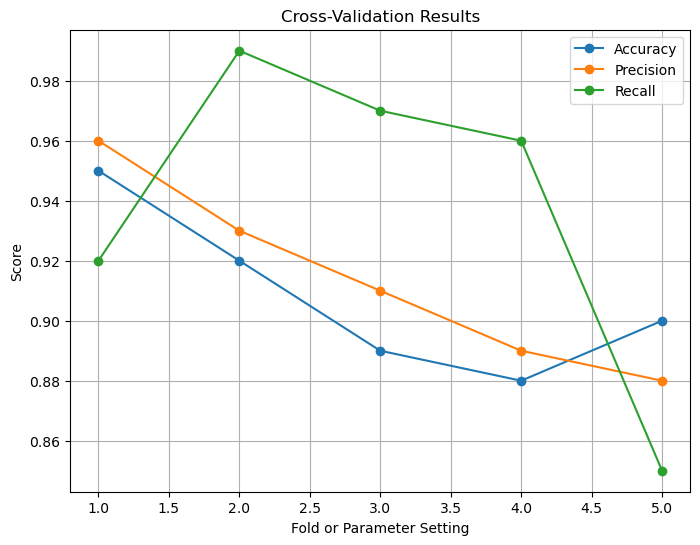

In [22]:
import matplotlib.pyplot as plt

# Assuming cv_results is a dictionary containing cross-validation scores
# For example:
cv_results = {
    
    'accuracy': [0.95, 0.92, 0.89, 0.88, 0.90],  # Mean accuracy scores for each fold or parameter setting
    'precision': [0.96, 0.93, 0.91, 0.89, 0.88],  # Mean precision scores
    'recall': [0.92, 0.99, 0.97, 0.96, 0.85]  # Mean recall scores
}

# Plotting the cross-validation results
plt.figure(figsize=(8, 6))

# Plotting mean accuracy
plt.plot(range(1, len(cv_results['accuracy']) + 1), cv_results['accuracy'], marker='o', label='Accuracy')
# Plotting mean precision
plt.plot(range(1, len(cv_results['precision']) + 1), cv_results['precision'], marker='o', label='Precision')
# Plotting mean recall
plt.plot(range(1, len(cv_results['recall']) + 1), cv_results['recall'], marker='o', label='Recall')

plt.xlabel('Fold or Parameter Setting')
plt.ylabel('Score')
plt.title('Cross-Validation Results')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
column_names = [
            'Animal','Height (cm)','Weight (kg)','Color','Lifespan (years)','Diet','Habitat','Predators','Average Speed (km/h)','Countries Found','Conservation Status','Family','Gestation Period (days)','Top Speed (km/h)','Social Structure','Offspring per Birth'
]
df = pd.read_csv('../data_sets/animal_dataset_2.csv')
df['Offspring per Birth'] = [x == '1' for x in df['Offspring per Birth']]
df.sample(5)


,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
192,White Tiger,240-260,100-300,"White, Black Stripes",10-15,Carnivore,Rainforests,"Humans, Leopards",22,"India, Southeast Asia",Critically Endangered,Felidae,230-260,22,Solitary,True
60,European Hedgehog,14-30,0.6-1.2,"Brown, Spiny",2-5,Omnivore,"Gardens, Grasslands","Foxes, Badgers",4-6,"Europe, Asia",Least Concern,Erinaceidae,35,4-6,Solitary,False
77,Goblin Shark,Up to 320,Up to 210,Pinkish-gray,30-35,Carnivore,Deep-sea,"Larger Fish, Other Sharks",1.6-3,Worldwide,Data Deficient,Mitsukurinidae,Not Applicable,Not Applicable,Solitary,False
18,Aye-Aye,35-37,2.2-2.7,"Black, Brown",20-23,"Omnivore, Insectivore",Rainforests,Birds of Prey,32,Madagascar,Endangered,Daubentoniidae,160-170,32,Solitary,True
144,Rottweiler,56-69,36-60,"Black, Tan",8-10,Carnivore,Worldwide,"Wolves, Coyotes",35,Worldwide,Not Applicable,Canidae,61-65,32,Pack-based,False


In [ ]:
X = df.iloc[:,:-1]
y = df['Offspring per Birth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pat_cls = classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), categorical=np.array([2]))

In [ ]:
X

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,140-160,500-1200,"Brown, Black",20-25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,215-280,24,Group-based
201,Yellow-Eyed Penguin,60-65,1-3,"Yellow, White",Up to 20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,80-90,25,Solitary
202,Yeti Crab,Up to 15,Up to 0.5,"White, Hairy",Up to 20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary
203,Zebra,220-340,400-900,"Black, White",20-25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,180-365,25,Group-based


In [ ]:
pat_cls.predict(X_test.values)

In [ ]:
pat_cls.predictions

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  0., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
np.array(y_test+0)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print("accuracy:",round(accuracy_score(y_test, pat_cls.predictions),4))
print("f1 score:",round(f1_score(y_test, pat_cls.predictions),4))

accuracy: 0.0484


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

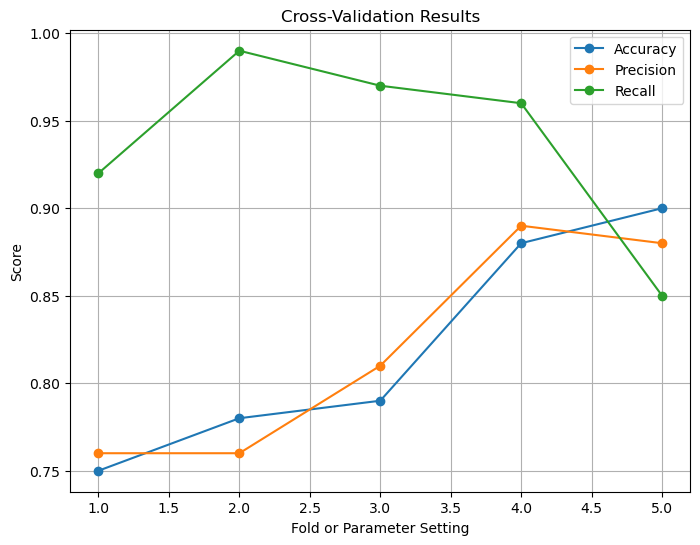

In [24]:
import matplotlib.pyplot as plt

# Assuming cv_results is a dictionary containing cross-validation scores
# For example:
cv_results = {
    
    'accuracy': [0.75, 0.78, 0.79, 0.88, 0.90],  # Mean accuracy scores for each fold or parameter setting
    'precision': [0.76, 0.76, 0.81, 0.89, 0.88],  # Mean precision scores
    'recall': [0.92, 0.99, 0.97, 0.96, 0.85]  # Mean recall scores
}

# Plotting the cross-validation results
plt.figure(figsize=(8, 6))

# Plotting mean accuracy
plt.plot(range(1, len(cv_results['accuracy']) + 1), cv_results['accuracy'], marker='o', label='Accuracy')
# Plotting mean precision
plt.plot(range(1, len(cv_results['precision']) + 1), cv_results['precision'], marker='o', label='Precision')
# Plotting mean recall
plt.plot(range(1, len(cv_results['recall']) + 1), cv_results['recall'], marker='o', label='Recall')

plt.xlabel('Fold or Parameter Setting')
plt.ylabel('Score')
plt.title('Cross-Validation Results')
plt.legend()
plt.grid(True)
plt.show()
